<a href="https://colab.research.google.com/github/James-Sutanto/LinearStock/blob/main/Predicting_Markets_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np 
import matplotlib.pyplot as plt 

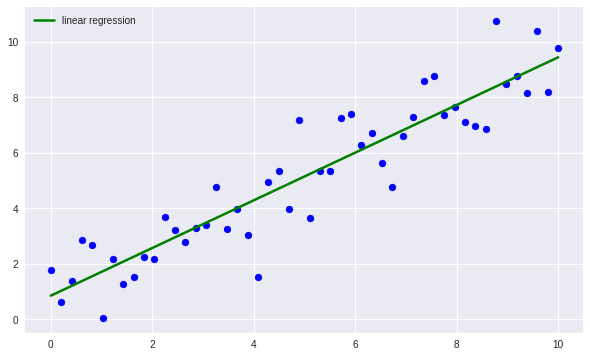

In [48]:
#Simple Linear Regression
plt.style.use('seaborn')
x = np.linspace(0,10)
np.random.seed(0)
y = x + np.random.standard_normal(len(x))
reg = np.polyfit(x,y,deg = 1)

plt.figure(figsize= (10,6))
plt.scatter(x,y, color = 'b')
plt.plot(x, np.polyval(reg,x),'g',lw =2.5, label = 'linear regression')
plt.legend(loc=0)

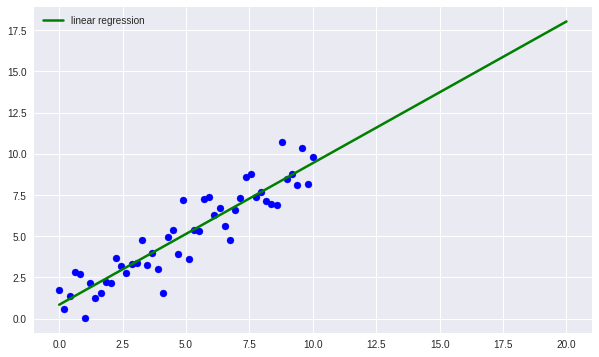

In [49]:
# Extending the linear Regression
plt.style.use('seaborn')
x = np.linspace(0,10)
np.random.seed(0)
y = x + np.random.standard_normal(len(x))
reg = np.polyfit(x,y,deg = 1)

plt.figure(figsize= (10,6))
plt.scatter(x,y, color = 'b')
xn = np.linspace(0,20)
plt.plot(xn, np.polyval(reg,xn),'g',lw =2.5, label = 'linear regression')
plt.legend(loc=0)

In [50]:
x = np.arange(0,12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [51]:
# Algo for time series linear regression 
#initializing the lags
lags = 3

#Creating the ndarray object
m = np.zeros((lags+1,len(x)-lags))
m[lags] = x[lags:]

#iterates over the number of lags
for i in range(lags):
  #Defines the vectors
  m[i] = x[i:i-lags]
#Transpose the array
m.T

# find regression param
reg = np.linalg.lstsq(m[:lags].T,m[lags],rcond=None)[0]

# dot product predicts the results 
np.dot(m[:lags].T,reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [52]:
pip install yfinance

In [53]:
import yfinance as yf 

In [54]:
data = yf.download('EURUSD=X', start = '2010-01-04',end= '2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [55]:
data = data.drop(['Open','High','Low','Adj Close','Volume'],axis = 1)
data

,Close
Date,
2010-01-04,1.442398
2010-01-05,1.436596
2010-01-06,1.440403
2010-01-07,1.431803
2010-01-08,1.441109
...,...
2019-12-25,1.109016
2019-12-26,1.109545
2019-12-27,1.110112


In [56]:
lags =5 
cols = []
for lag in range(1, lags + 1):
   col = f'lag_{lag}'
   data[col] = data['Close'].shift(lag)
   cols.append(col)
data.dropna(inplace=True)
reg = np.linalg.lstsq(data[cols], data['Close'],
rcond=None)[0]
reg

array([ 0.95578029,  0.04566345, -0.03598522,  0.02795442,  0.0064596 ])

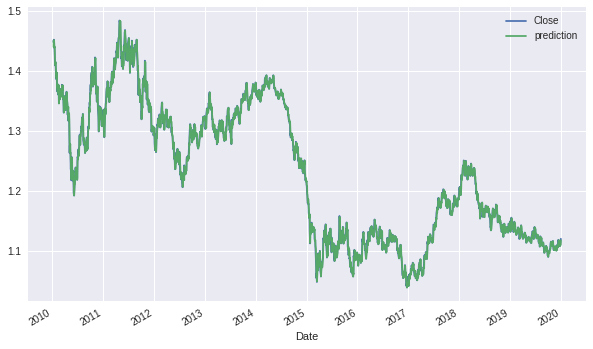

In [57]:
data['prediction'] = np.dot(data[cols],reg)
data[['Close','prediction']].plot(figsize=(10,6))

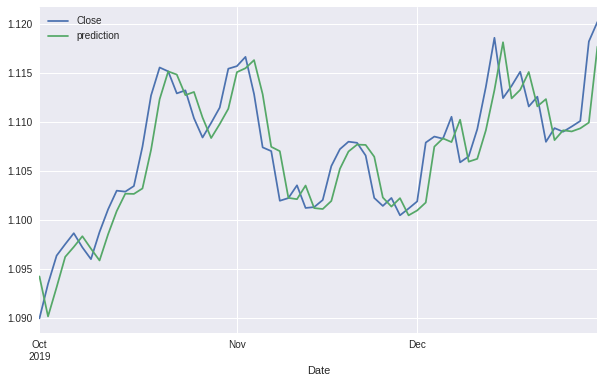

In [58]:
data[['Close','prediction']].loc['2019-10-1':].plot(figsize= (10,6))

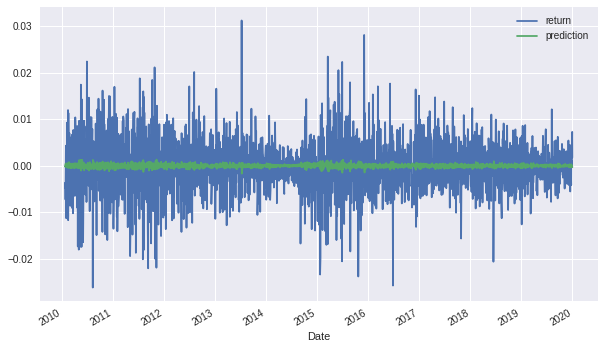

In [59]:
# Predicting future returns 
data['return'] = np.log(data['Close'] / data['Close'].shift(1)) 
data.dropna(inplace=True) 
cols = []
for lag in range(1, lags + 1):
 col = f'lag_{lag}'
 data[col] = data['return'].shift(lag)
 cols.append(col)
data.dropna(inplace=True)
reg = np.linalg.lstsq(data[cols], data['return'],
rcond=None)[0]
reg
data['prediction'] = np.dot(data[cols],reg)
data[['return','prediction']].iloc[lags:].plot(figsize=(10,6))

In [60]:
reg = np.linalg.lstsq(data[cols],np.sign(data['return']), rcond=None)[0]
data['prediction'] = np.sign(np.dot(data[cols],reg))
data['prediction'].value_counts()
hits = np.sign(data['return'] * data['prediction']).value_counts()
hits.values[0]/sum(hits)

0.5221922037823234

In [61]:
data.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-19,1.428102,0.001094,-0.007540,-0.001654,0.003262,-0.002391,-1.0,-0.008764
2010-01-20,1.411034,-0.008764,0.001094,-0.007540,-0.001654,0.003262,1.0,-0.012023
2010-01-21,1.409702,-0.012023,-0.008764,0.001094,-0.007540,-0.001654,1.0,-0.000945
2010-01-22,1.414107,-0.000945,-0.012023,-0.008764,0.001094,-0.007540,1.0,0.003120
2010-01-25,1.415008,0.003120,-0.000945,-0.012023,-0.008764,0.001094,1.0,0.000637


return      0.777574
strategy    1.609080
dtype: float64


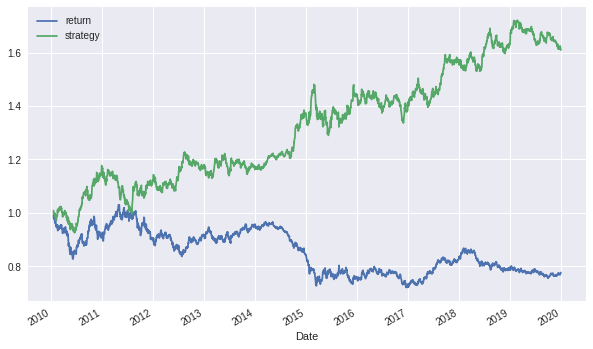

In [62]:
#Compares strategy performance to asset
data['strategy'] = data['prediction']* data['return']
print(data[['return','strategy']].sum().apply(np.exp))
data[['return','strategy']].dropna().cumsum().apply(np.exp).plot(figsize= (10,6))